## Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

## Замечания

В SGD градиент расчитывается по одному случайному объекту

Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
Правило останова - максимальное количество эпох
Эпохой в SGD и MB-SGD называется один проход по всем объектам в выборке (тем или иным способом)

## Реализация модели

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self,C=0, alpha=0.01, max_epoch=10, penalty = ''):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.penalty = penalty
        
        
        self.error_epoch_list = [] # Список для хранения ошибок по эпохам
        self.error_iter_list = [] # Список для хранения ошибок по итерациям
        self.weight_list = [] # Веса
        self.w = None
        
        
        """
        Итак нам нужно 1.Сигмоид (Есть)
                       2.Градиент(Должен принимать отдельные элементы)
                       3.Функция потерь
                       4.Предсказания
                       
        """
        
    def sigmoid(self,t):
        
        return 1 / (1 + np.exp(-t))
    
    def gradients(self,xi,yi):
        

        
        t = xi.dot(self.w)
        
        y_pred = 1.0 / (1.0 + np.exp(-t))
                
        gradients = xi.T.dot(y_pred - yi)
        
        if self.penalty == 'L1':
            gradients[1:] += -1.0 * self.C * np.sign(self.w[1:])  
        if self.penalty == 'L2':
            gradients[1:] += -2.0 * self.C * self.w[1:]
        
        return gradients
    
#     grad = (self.F(xi.dot(w)) - yi)*xi
            
            
        
    
    def fit(self,X, y):
        '''
        Обучение модели
        '''
       
        
        X_b = np.c_[np.ones((len(X), 1)), X]  # Добавляем деффолтный столбец 1чек
        
        m = len(X_b)
        
        # Инициализируем веса модели (случайными числами) 3 признаки первые 3 веса(Коэффициента)
        self.w = np.random.randn(X_b.shape[1], 1)
        
        for epoch in range(self.max_epoch):
            
            # Список случайных индексов
            p = np.random.permutation(m)
             
            # Делаем итерацию по этим индексам для SDG
            for index in p:
                xi = X_b[[index]]  
                yi = y[[index]]
                
                grad = self.gradients(xi,yi)
            
                #Обновляем веса на величину градиента с некоторым коэфициентом alpha 
                self.w = self.w - self.alpha * grad
                
                # Добавляем в конце итерации ошибку функии и веса           
                self.error_iter_list.append(self.Log_loss(X_b,y)) 
                self.weight_list.append(np.copy(self.w))
                
            # Добавляем в соответствующий массив ошибку после итерации
            self.error_epoch_list.append(self.Log_loss(X_b,y)) 
        
            
        
        return self
    
    def Log_loss(self,X_b, y):
        '''
        Функция потерь
        '''
        t = X_b.dot(self.w)
        predictions = self.sigmoid(t)
        
        
        eps = 1e-15
        predictions = np.clip(predictions, eps, 1 - eps)
        
        # Подставляем формулу
        
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        
     
        if self.penalty == 'L1':
            loss += self.C * np.sum(np.absolute(self.w))
        if self.penalty == 'L2':
            loss += self.C * np.sum(self.w**2)
            
        
        return loss 
    
    
    
    def partial_fit(X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(X):
        '''
        Возвращение метки класса
        '''
        y_pred_proba = predict_proba(X)
        
        if y_pred_proba[0] > y_pred_proba[1]: y_hat = 1
            
        else: y_hat = 0   
            
        return y_hat
    
    def predict_proba(X):
        '''
        Возвращение вероятности каждого из классов
        '''
        X_b = np.c_[np.ones((len(X), 1)), X]
        t = X_b.dot(w)
        
        y_pred_proba =  self.sigmoid(t)       
        
        return y_pred_proba

## Проверка на синтетических данных (2 балл)
Запустите ваш алгоритм на синтетических данных. Выведите полученные веса и нарисуйте разделяющую границу между классами.

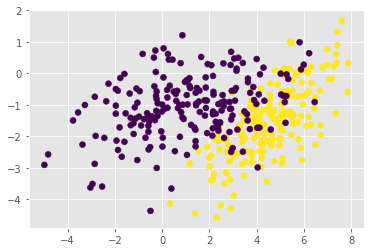

In [3]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y);

In [4]:
model = MySGDClassifier(C = 0.10,max_epoch=100,alpha = 0.0005)
model.fit(X, y)

MySGDClassifier(C=0.1, alpha=0.0005, max_epoch=100, penalty='')

In [5]:
print(model.w)

[[-1.24843009]
 [ 0.48612442]
 [-0.1753019 ]]


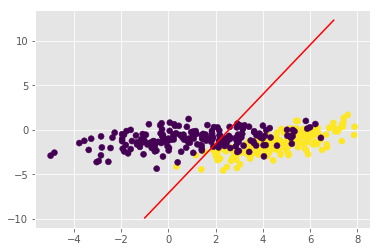

In [6]:
x_naive = np.array([-1, 7])
y_naive = -(model.w[0] + model.w[1] * x_naive) / model.w[2]
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive');

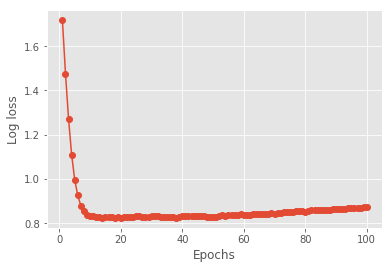

In [7]:
plt.plot(range(1, len(model.error_epoch_list) + 1), model.error_epoch_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.show()

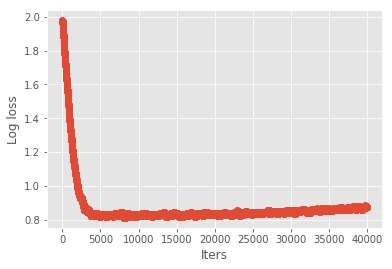

In [8]:
plt.plot(range(1, len(model.error_iter_list) + 1), model.error_iter_list, marker='o')
plt.xlabel('Iters')
plt.ylabel('Log loss')
plt.show()

In [9]:
model2 = MySGDClassifier(C = 0.001,max_epoch=100,alpha = 0.0005, penalty='L2')
model2.fit(X, y)

MySGDClassifier(C=0.001, alpha=0.0005, max_epoch=100, penalty='L2')

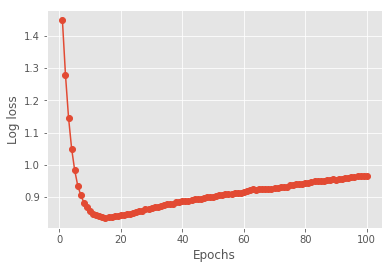

In [10]:
plt.plot(range(1, len(model2.error_epoch_list) + 1), model2.error_epoch_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.show()

In [11]:
model3 = MySGDClassifier(C = 0.001,max_epoch=100,alpha = 0.0005, penalty='L1')
model3.fit(X, y)

MySGDClassifier(C=0.001, alpha=0.0005, max_epoch=100, penalty='L1')

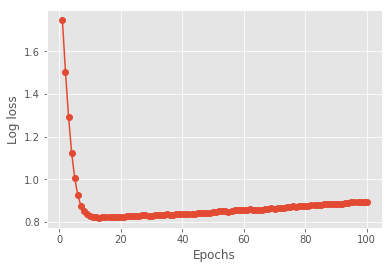

In [12]:
plt.plot(range(1, len(model3.error_epoch_list) + 1), model3.error_epoch_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.show()